<a href="https://colab.research.google.com/github/AndrewLi19/ML_Assignment/blob/main/Assignment6/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from cvxopt  import solvers,matrix

In [ ]:
!git clone "https://github.com/AndrewLi19/ML_Assignment"

Cloning into 'ML_Assignment'...
remote: Enumerating objects: 10123, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 10123 (delta 38), reused 76 (delta 35), pack-reused 10044
Receiving objects: 100% (10123/10123), 64.10 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (42/42), done.


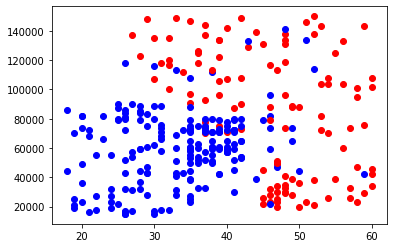

In [ ]:
path='/content/ML_Assignment/Assignment6/datasets'
features=np.load(path+'/X_train.npy',encoding = "latin1")
labels=np.load(path+'/y_train.npy',encoding = "latin1")
x = features[:,0]
y = features[:,1]
for i in range(0,300):
  if labels[i]==1:
    plt.scatter(x[i],y[i],color='r',label=1)
  else:
    plt.scatter(x[i],y[i],color='b',label=0)
plt.show()
labels[labels==0]=-1
features=np.concatenate((features,np.ones((features.shape[0],1))),axis=1)

In [ ]:
tmp = np.identity(len(labels))
row, col = np.diag_indices_from(tmp)
tmp[row,col] = np.array(labels)
g = np.dot(tmp,features)
h = np.ones(g.shape[0])
g = matrix(-1*g)
h = matrix(-1*h)
p = np.identity(3)
row, col = np.diag_indices_from(p)
p[row,col] = np.array([1,1,0])
p = matrix(p)
q = matrix(np.zeros(3))

In [ ]:
sol = solvers.qp(p,q,g,h)
print (sol['x'])
#原问题无法用硬间隔SVM求解，故QP方法无可行解

     pcost       dcost       gap    pres   dres
 0:  1.4215e-03  4.2505e+02  2e+03  3e+00  3e+06
 1:  2.2507e-03  8.1197e+02  1e+03  2e+00  2e+06
 2:  6.1739e-05  2.3944e+03  1e+03  1e+00  2e+06
 3:  3.8637e-06  8.0013e+03  9e+02  1e+00  1e+06
 4:  2.6798e-06  2.6015e+04  2e+03  1e+00  1e+06
 5:  2.4645e-09  3.3739e+05  8e+02  1e+00  1e+06
 6:  1.3528e-09  6.7396e+07  8e+04  1e+00  1e+06
 7:  4.4309e-11  4.4520e+10  1e+07  1e+00  1e+06
 8:  1.0254e-14  1.9554e+14  7e+08  1e+00  1e+06
 9:  1.0429e-18  5.6728e+19  2e+12  1e+00  3e+08
10:  1.0467e-22  1.6319e+27  6e+17  1e+00  2e+16
11:  4.3996e-25  4.3890e+36  1e+26  1e+00  4e+25
12:  1.9922e-25  1.1212e+46  3e+35  1e+00  6e+31
13:  9.2998e-25  1.5463e+55  4e+44  1e+00  4e+43
14:  1.6702e-25  1.5701e+64  3e+53  1e+00  2e+52
15:  2.4809e-25  1.3509e+73  3e+62  1e+00  2e+62
16:  1.8103e-25  9.5134e+81  2e+71  1e+00  4e+70
17:  2.6121e-25  7.8030e+90  2e+80  1e+00  6e+76
18:  1.5690e-25  5.1735e+99  1e+89  1e+00  9e+88
19:  2.5903e-25  3.87

ValueError: ignored